**Energy is defined as:**

\begin{equation}
 E = TH^{2}
\end{equation}

Where H is the wave height and T is the period 

In [1]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook',font_scale=1.5)
sns.set_style('ticks')
import pandas as pd
%matplotlib inline

In [2]:
# Import Inshore Wave data for profile 1 and save to variable Inshore_Waves

Inshore_Waves = pd.read_csv('Inshore_Waves_PF1.csv', index_col=0)

# Change Date column to Datetime

Date = pd.DataFrame(pd.to_datetime(Inshore_Waves.Date))

In [3]:
# Create Wave Height Dataframe
Wave_Height = pd.DataFrame(Inshore_Waves.Wave_Height)
Period = pd.DataFrame(Inshore_Waves.Period)

# Creating the Energy DataFrame

Energy = pd.DataFrame(((Wave_Height.Wave_Height)**2) * Period.Period)

In [4]:
Energy.rename(columns={0:'Energy'}, inplace=True)

In [5]:
Energy = Energy.join(Date)
Energy = Energy.set_index('Date')

In [39]:
Energy.head()

,Energy
Date,
1979-01-15 00:00:00,12.996100
1979-01-15 04:00:00,12.203125
1979-01-15 05:00:00,11.906523
1979-01-15 06:00:00,11.144707
1979-01-15 07:00:00,10.328725


In [12]:
# Daily Average

Energy_Day_Avg = Energy.resample('D').mean()
Energy_Day_Avg.rename(columns={'Energy': 'Energy_Day_Avg'}, inplace=True)

# Weekly Average

Energy_Week_Avg = Energy.rolling(7, freq='D').mean()
Energy_Week_Avg.rename(columns={'Energy': 'Energy_Week_Avg'}, inplace=True)



# Monthly Average

Energy_Month_Avg = Energy.rolling(30, freq='D').mean()
Energy_Month_Avg.rename(columns={'Energy': 'Energy_Month_Avg'}, inplace=True)



In [34]:
feature = pd.read_csv('Feature_Matrix.csv')
new_date = pd.DataFrame(pd.to_datetime(feature.Date))
del feature['Date']
feature = feature.join(new_date)
feature.set_index('Date', inplace=True)

In [36]:
feature = feature.join(Energy_Day_Avg)
feature = feature.join(Energy_Week_Avg)
feature = feature.join(Energy_Month_Avg)

In [37]:
feature

,Height_Avg_Day,Height_Avg_Week,Height_Avg_Month,T_Avg_Day,T_Avg_Week,T_Avg_Month,Theta_Avg_Day,Theta_Avg_Week,Theta_Avg_Month,Energy_Day_Avg,Energy_Week_Avg,Energy_Month_Avg
Date,,,,,,,,,,,,
1979-01-15,1.361429,NaN,NaN,8.103810,NaN,NaN,105.238095,NaN,NaN,15.224497,NaN,NaN
1979-01-16,1.366667,NaN,NaN,7.970417,NaN,NaN,119.541667,NaN,NaN,14.884562,NaN,NaN
1979-01-17,1.237083,NaN,NaN,7.822500,NaN,NaN,101.333333,NaN,NaN,11.924259,NaN,NaN
1979-01-18,1.269167,NaN,NaN,7.209167,NaN,NaN,111.791667,NaN,NaN,11.612399,NaN,NaN
1979-01-19,1.046250,NaN,NaN,6.797500,NaN,NaN,107.500000,NaN,NaN,7.450787,NaN,NaN
1979-01-20,1.212917,NaN,NaN,9.509167,NaN,NaN,100.375000,NaN,NaN,14.206599,NaN,NaN
1979-01-21,1.502500,1.238571,NaN,10.808333,8.191429,NaN,99.791667,106.285714,NaN,24.423133,12.829496,NaN
1979-01-22,1.725417,1.265714,NaN,9.630833,8.521429,NaN,101.000000,108.714286,NaN,28.967350,14.144481,NaN
1979-01-23,1.767083,1.361429,NaN,7.672083,8.618571,NaN,112.833333,106.857143,NaN,24.453200,17.236311,NaN


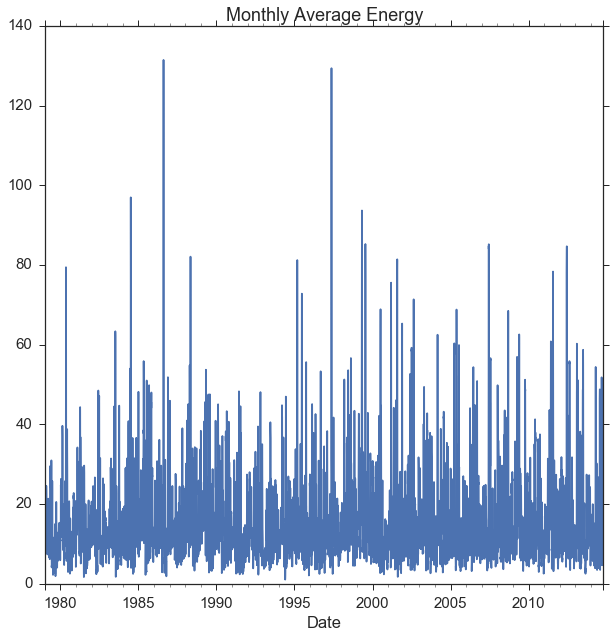

In [57]:
feature.Energy_Week_Avg.plot(figsize=(10,10), title='Monthly Average Energy')

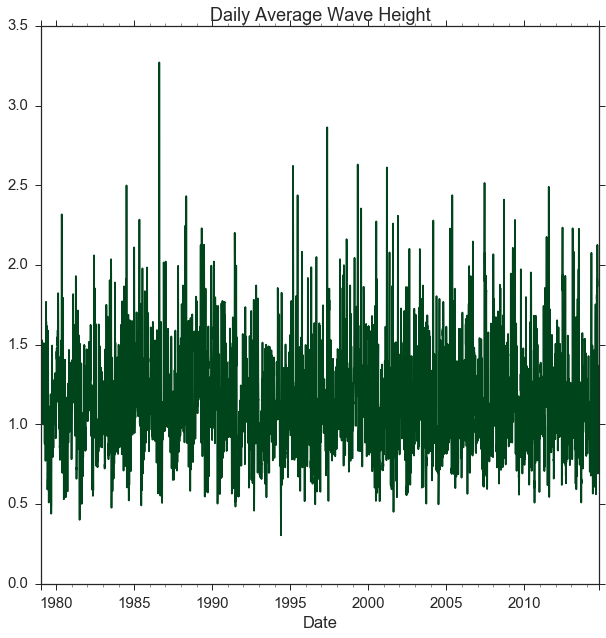

In [62]:
feature.Height_Avg_Week.plot(figsize=(10,10), title='Daily Average Wave Height', colormap='Greens_r')